## Feature Engineering


### 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---
### 2. Load data

In [2]:
df = pd.read_csv('D:\\Projects\BCG\\df_clean.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


---

### 3. Feature engineering

#### Difference between off-peak prices in December and preceding January


In [6]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id 

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885
...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,40.728885
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,40.728885
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,40.728885
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,40.728885


In [8]:

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
jan_prices.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931


In [9]:
jan_prices.shape

(16096, 4)

In [10]:

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [11]:
df=pd.merge(df,diff,on='id')
df


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.008653,0.177779
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,1.802667e-08,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,1,-0.007395,0.236694
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,1,-0.006192,0.162916
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779


In [12]:
df.shape

(14606, 46)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  object        
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

### Feature Engineering :

#### ID:

In [14]:
df['id'].value_counts()

id
24011ae4ebbe3035111d65fa7c15bc57    1
2fae70276cd7a4874a2aefcd68d5a184    1
a7a9dac0ffc2ad56c66a1b08d53d0e51    1
6cfbce2099a4163ea4fe422fb28829ea    1
4289e929ecd35a0754e697feb24a091b    1
                                   ..
0b69432a3ceee7763bf86ffe30c6bc2d    1
6cabca88c760284183f51f84e4a27b1e    1
de92494d7140dc94be6a1ebafaf98056    1
a8e828bfad0869527e9acdd39a36cc91    1
563dde550fd624d7352f3de77c0cdfcd    1
Name: count, Length: 14606, dtype: int64

In [15]:
# we drop the ID
df.drop('id',axis=1,inplace=True)

#### Channel Sales :

In [16]:
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [17]:
# For this feature we try target label encoding:
# It's Kind of like Label Encoding (ordinal)- But In this context also we can use this
# We can Use One Hot Encoding Technique
df['channel_sales']=df['channel_sales'].map({
    'fixdbufsefwooaasfcxdxadsiekoceaa':1,
    'epumfxlbckeskwekxbiuasklxalciiuu':2,
    'sddiedcslfslkckwlfkdpoeeailfpeds':3,
    'ewpakwlliwisiwduibdlfmalxowmwpci':4,
    'usilxuppasemubllopkaafesmlibmsdf':5,
    'lmkebamcaaclubfxadlmueccxoimlema':6,
    
    'MISSING':7,
    'foosdfpfkusacimwkcsosbicdxkicaua':8
    
})

In [18]:
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,8,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,7,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,8,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,6,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,7,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


#### Has Gas:

In [19]:
# For this Feature we use one Hot encoding Technique:
df_has_gas=pd.get_dummies(df['has_gas']).astype(int)

In [20]:
df_has_gas.head(4)

,f,t
0,0,1
1,1,0
2,1,0
3,1,0


In [21]:
# We take 2nd column Because In that True is encoded as 1 
df_has_gas.drop('f',axis=1,inplace=True)

In [22]:
df_has_gas=df_has_gas.rename(columns={'t':"having_gas"})
df=pd.concat([df,df_has_gas],axis=1)
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,having_gas
0,8,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961,1
1,7,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0
2,8,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779,0
3,6,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779,0
4,7,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916,0


####  origin_up :

In [23]:
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [24]:
#  For this Feature also we are using One Hot encoding :
df_origin=pd.get_dummies(df['origin_up']).astype(int)
df_origin.head()

,MISSING,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [25]:
df=pd.concat([df,df_origin],axis=1)
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,having_gas,MISSING,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
0,8,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,1,0.020057,3.700961,1,0,0,0,0,1,0
1,7,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0,-0.003767,0.177779,0,0,0,1,0,0,0
2,8,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0,-0.004670,0.177779,0,0,0,1,0,0,0
3,6,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0,-0.004547,0.177779,0,0,0,1,0,0,0
4,7,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0,-0.006192,0.162916,0,0,0,1,0,0,0


In [26]:
df.drop(['has_gas','origin_up'],axis=1,inplace=True)

#### DATE :
 1   date_activ                        
 
 2   date_end                          
 
 3   date_modif_prod                   
 
 4   date_renewal                      

##### We can Use Ordinal Encoding for Date where the order of the date also matters

In [27]:
#date_activ
df.sort_values(by='date_activ', inplace=True)
date_encoding = {date: idx + 1 for idx, date in enumerate(df['date_activ'])}
df['date_activ'] = df['date_activ'].map(date_encoding)

In [28]:
# Date_End
df.sort_values(by='date_end', inplace=True)
date_encoding = {date: idx + 1 for idx, date in enumerate(df['date_end'])}
df['date_end'] = df['date_end'].map(date_encoding)

In [29]:
##date_modif_prod
df.sort_values(by='date_modif_prod', inplace=True)
date_encoding = {date: idx + 1 for idx, date in enumerate(df['date_modif_prod'])}
df['date_modif_prod'] = df['date_modif_prod'].map(date_encoding)

In [30]:
## date_renewal
df.sort_values(by='date_renewal', inplace=True)
date_encoding = {date: idx + 1 for idx, date in enumerate(df['date_renewal'])}
df['date_renewal'] = df['date_renewal'].map(date_encoding)

In [31]:
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,having_gas,MISSING,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
9538,5,7282,914,1394,7914,9249,12189,1,824.98,1394,...,0,-0.002085,1.677779,1,0,0,1,0,0,0
9178,8,6138,2313,0,8000,3715,9083,2,913.23,0,...,0,-0.003423,0.177779,1,0,0,0,0,1,0
14363,8,7277,0,0,11953,7845,11749,3,1217.86,0,...,0,-0.048868,-1.316221,0,0,0,0,0,1,0
13789,5,95522,0,12213,12043,1358,14289,4,923.50,1290,...,0,-0.050894,-1.316221,0,0,0,0,0,1,0
494,8,1408,0,110,1254,3014,9888,5,206.48,110,...,0,-0.003128,-0.177780,0,0,0,0,1,0,0


#### Drop some Unwanted feature:

Feature have correlation 1 is unwanted , Because 1 Feature is enough . Otherwise it will create overfitting or Unwanted noise.

In [32]:
df.drop(['var_6m_price_p3_fix','var_6m_price_p2_fix','var_6m_price_p1_fix','var_6m_price_p3_var',
        'var_6m_price_p2_var','var_6m_price_p1_var','var_year_price_p3_fix','var_year_price_p2_fix',
        'var_year_price_p1_fix','var_year_price_p3_var','var_year_price_p2_var','var_year_price_p1_var'],
       axis=1,inplace=True)

In [33]:
df=df.reset_index()

In [34]:
df.head()

,index,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,having_gas,MISSING,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
0,9538,5,7282,914,1394,7914,9249,12189,1,824.98,...,0,-0.002085,1.677779,1,0,0,1,0,0,0
1,9178,8,6138,2313,0,8000,3715,9083,2,913.23,...,0,-0.003423,0.177779,1,0,0,0,0,1,0
2,14363,8,7277,0,0,11953,7845,11749,3,1217.86,...,0,-0.048868,-1.316221,0,0,0,0,0,1,0
3,13789,5,95522,0,12213,12043,1358,14289,4,923.50,...,0,-0.050894,-1.316221,0,0,0,0,0,1,0
4,494,8,1408,0,110,1254,3014,9888,5,206.48,...,0,-0.003128,-0.177780,0,0,0,0,1,0,0


In [35]:
df.drop('index',axis=1,inplace=True)
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,having_gas,MISSING,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
0,5,7282,914,1394,7914,9249,12189,1,824.98,1394,...,0,-0.002085,1.677779,1,0,0,1,0,0,0
1,8,6138,2313,0,8000,3715,9083,2,913.23,0,...,0,-0.003423,0.177779,1,0,0,0,0,1,0
2,8,7277,0,0,11953,7845,11749,3,1217.86,0,...,0,-0.048868,-1.316221,0,0,0,0,0,1,0
3,5,95522,0,12213,12043,1358,14289,4,923.50,1290,...,0,-0.050894,-1.316221,0,0,0,0,0,1,0
4,8,1408,0,110,1254,3014,9888,5,206.48,110,...,0,-0.003128,-0.177780,0,0,0,0,1,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   channel_sales                     14606 non-null  int64  
 1   cons_12m                          14606 non-null  int64  
 2   cons_gas_12m                      14606 non-null  int64  
 3   cons_last_month                   14606 non-null  int64  
 4   date_activ                        14606 non-null  int64  
 5   date_end                          14606 non-null  int64  
 6   date_modif_prod                   14606 non-null  int64  
 7   date_renewal                      14606 non-null  int64  
 8   forecast_cons_12m                 14606 non-null  float64
 9   forecast_cons_year                14606 non-null  int64  
 10  forecast_discount_energy          14606 non-null  float64
 11  forecast_meter_rent_12m           14606 non-null  float64
 12  fore

### Model Building:

In [37]:
x=df.drop('churn',axis=1)
y=df['churn']

In [38]:
# Import Model Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sc=StandardScaler()

In [39]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [45]:
params={
    'n_estimators': [50, 100,150,175,200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of each tree (None means no limit)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [46]:
# Train Random Forest Classifier :

# Create the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(model,param_grid=params,scoring='f1',cv=5,n_jobs=-1)

In [48]:
# Feature Scaling Using Standard scaler

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [49]:
# Train the classifier on the training data
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 175, 200]},
             scoring='f1')

In [50]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175}
0.09734388603564231


In [51]:
# Train the classifier with the best hyperparameters on the full training data
best_rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
best_rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Make predictions on the test data
y_pred = model.predict(x_test)


In [53]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2661
           1       0.86      0.07      0.13       261

    accuracy                           0.92      2922
   macro avg       0.89      0.53      0.54      2922
weighted avg       0.91      0.92      0.88      2922

Confusion Matrix:
[[2658    3]
 [ 243   18]]


<AxesSubplot:>

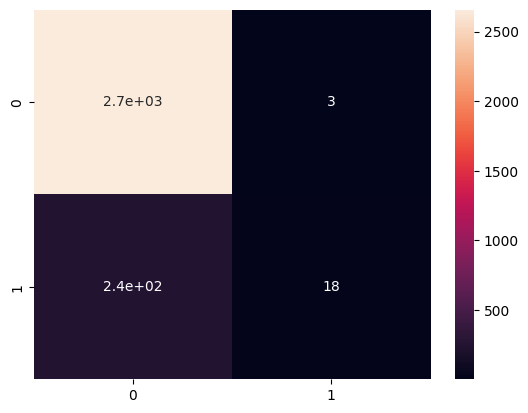

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,annot_kws={'size':10})

In [55]:
# Feature Importance Analysis
feature_importances = best_rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

print("Feature Importances:")
for i, index in enumerate(sorted_indices):
    print(f"{i+1}. Feature: {x.columns[index]}, Importance: {feature_importances[index]:.4f}")

Feature Importances:
1. Feature: cons_12m, Importance: 0.0616
2. Feature: date_activ, Importance: 0.0593
3. Feature: forecast_meter_rent_12m, Importance: 0.0588
4. Feature: net_margin, Importance: 0.0583
5. Feature: forecast_cons_12m, Importance: 0.0546
6. Feature: margin_net_pow_ele, Importance: 0.0542
7. Feature: margin_gross_pow_ele, Importance: 0.0526
8. Feature: date_modif_prod, Importance: 0.0524
9. Feature: date_end, Importance: 0.0521
10. Feature: date_renewal, Importance: 0.0487
11. Feature: pow_max, Importance: 0.0440
12. Feature: offpeak_diff_dec_january_energy, Importance: 0.0432
13. Feature: cons_last_month, Importance: 0.0413
14. Feature: forecast_price_energy_off_peak, Importance: 0.0359
15. Feature: imp_cons, Importance: 0.0345
16. Feature: forecast_cons_year, Importance: 0.0333
17. Feature: var_year_price_p1, Importance: 0.0329
18. Feature: forecast_price_energy_peak, Importance: 0.0213
19. Feature: var_6m_price_p1, Importance: 0.0192
20. Feature: var_year_price_p2, Im

### Ensemble With Bagging :

### Feature Extraction :

#### Based on the Feature Importance :
30. Feature: lxidpiddsbxsbosboudacockeimpuepw, Importance: 0.0067
31. Feature: kamkkxfxxuwbdslkwifmmcsiusiuosws, Importance: 0.0053
33. Feature: ldkssxwpmemidmecebumciepifcamkci, Importance: 0.0042
34. Feature: forecast_discount_energy, Importance: 0.0025
35. Feature: MISSING, Importance: 0.0006
36. Feature: ewxeelcelemmiwuafmddpobolfuxioce, Importance: 0.0000
37. Feature: usapbepcfoloekilkwsdiboslwaxobdp, Importance: 0.0000

These Features are dropped because it didn't show any significant importance

In [37]:
df.drop(['lxidpiddsbxsbosboudacockeimpuepw','kamkkxfxxuwbdslkwifmmcsiusiuosws',
        'ldkssxwpmemidmecebumciepifcamkci','forecast_discount_energy','MISSING',
        'ewxeelcelemmiwuafmddpobolfuxioce','usapbepcfoloekilkwsdiboslwaxobdp'],axis=1,inplace=True)

In [38]:
x=df.drop('churn',axis=1)
y=df['churn']

##### Feature Scaling and Train_Test_split

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()

In [43]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [44]:
# Feature Scaling Using Standard scaler

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#### Model Training:

In [49]:
# importing Necessary Libraries :

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Base classifiers
# Decision Tree - We Go with Gini 

clf1 = DecisionTreeClassifier(max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42)


In [50]:
# Random Forest

clf2 = RandomForestClassifier(n_estimators=175,max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42)


In [51]:
# KNN Classifier

clf3 = KNeighborsClassifier(n_neighbors=5,weights='uniform',p=1)

In [52]:
# Logistic Regression 
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
logistic_reg= LogisticRegression(max_iter=1000, random_state=42)
clf4 = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, n_jobs=-1)

In [53]:
# Support Vector Machine

clf5= SVC(kernel='rbf',C=1.0,gamma=0.1)

In [54]:
# Bagging with multiple algorithms
# Create Bagging classifiers for each base classifier
bagging_clf1 = BaggingClassifier(estimator=clf1, n_estimators=10, random_state=42)
bagging_clf2 = BaggingClassifier(estimator=clf2, random_state=42)
bagging_clf3 = BaggingClassifier(estimator=clf3, n_estimators=10, random_state=42)
bagging_clf4 = BaggingClassifier(estimator=clf4, n_estimators=10, random_state=42)
bagging_clf5 = BaggingClassifier(estimator=clf5, n_estimators=10, random_state=42)


In [55]:
# Training
# Create the Voting Classifier

voting_clf = VotingClassifier(estimators=[
    ('dt', bagging_clf1),
    ('rf', bagging_clf2),
    ('knn', bagging_clf3),
    ('lr', bagging_clf4),
    ('svc', bagging_clf5)
])

In [56]:
# Training
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('dt',
                              BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                random_state=42)),
                             ('rf',
                              BaggingClassifier(estimator=RandomForestClassifier(n_estimators=175,
                                                                                 random_state=42),
                                                random_state=42)),
                             ('knn',
                              BaggingClassifier(estimator=KNeighborsClassifier(p=1),
                                                random_state=42)),
                             ('lr',
                              BaggingClassifier(estimator=GridSearchCV(cv=5,
                                                                       estimator=LogisticRegression(max_iter=1000,
                                                                                                    random_state=42),
                                                                       n_jobs=-1,
                                                                       param_grid={'C': [0.001,
                                                                                         0.01,
                                                                                         0.1,
                                                                                         1,
                                                                                         10,
                                                                                         100]}),
                                                random_state=42)),
                             ('svc',
                              BaggingClassifier(estimator=SVC(gamma=0.1),
                                                random_state=42))])

In [57]:
# Predictions
y_pred = voting_clf.predict(x_test)

In [59]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9130732375085557


In [60]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2661
           1       1.00      0.03      0.05       261

    accuracy                           0.91      2922
   macro avg       0.96      0.51      0.50      2922
weighted avg       0.92      0.91      0.87      2922

Confusion Matrix:
[[2661    0]
 [ 254    7]]


<AxesSubplot:>

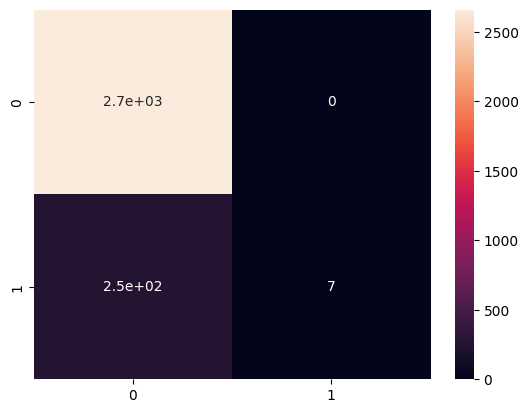

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,annot_kws={'size':10})

### Observation :

1. After Ensemble there is no significant difference between f1-score and Accuracy.
2. Feature extraction also done . 